In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
cases_text_onlyspeaker_df = pd.read_csv("cases_text_onlyspeaker.csv")
cases_text_onlyspeaker_df.head()

,new_name,sentence,sentence_clean,topic_mentioned,sentiment,prob_score_neg,prob_score_neutral,prob_score_pos,has_parking,has_econactivity,...,sent_voice_mentioned,sentpol_voice_mentioned,prob_pos_voice_mentioned,prob_neg_voice_mentioned,positive_voice_mentioned,negative_voice_mentioned,num_voice_mentioned,num_sentences,sentence_lower,count_my_name
0,09-12-2017audio_6ZA-2017-210-CU-1A,My name is Jerry Newman.,My name is Jerry Newman.,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,my name is jerry newman.,1
1,09-12-2017audio_6ZA-2017-210-CU-1A,"Thank you, President Chunkham, members of the ...","Thank you, President Chunkham, members of the ...",NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,"thank you, president chunkham, members of the ...",0
2,09-12-2017audio_6ZA-2017-210-CU-1A,The question that is asked and that was asked ...,The question that is asked and that was asked ...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,the question that is asked and that was asked ...,0
3,09-12-2017audio_6ZA-2017-210-CU-1A,And I think Mr. Chang made an adequate descrip...,And I think Mr. Chang made an adequate descrip...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,and i think mr. chang made an adequate descrip...,0
4,09-12-2017audio_6ZA-2017-210-CU-1A,We started thinking through a business plan an...,We started thinking through a business plan an...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,we started thinking through a business plan an...,0


Parking Example Sentences

In [3]:
parking_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_parking'] == 1]
random_parking_rows = parking_rows.sample(n=10)
random_parking_sentences = random_parking_rows["sentence"].tolist()
random_parking_sentences

['So if the off-site parking is removed from this case, He would have to shrink his project so he wouldnt have the higher parking requirement.',
 'And hopefully weve cleared the parking lot.',
 'Accordingly, each of these facilities has placarded generous percentage of their parking spaces as resident onlythree facilities have got a total of 155 park and spots and 67 of those are set aside for residents only.',
 'And so would you talk about the parking?',
 'I host a capacity of about 400 to 550 guests at these private events so that would measure to about half of the capacity and that empty building right now and anybody who says that the parking structure is under utilized is completely mistaken and has not taken the time to see the successful businesses that are open for business now.',
 'So I cant say that the incentives dont result in actual cost reductions because what the, incentives do is allow them to build a couple of more market rate units to help pay for and subsidize that a

Nuisance Example Sentences

In [4]:
nuisance_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_nuisance'] == 1]
random_nuisance_rows = parking_rows.sample(n=10)
random_nuisance_sentences = random_parking_rows["sentence"].tolist()
random_nuisance_sentences

['So if the off-site parking is removed from this case, He would have to shrink his project so he wouldnt have the higher parking requirement.',
 'And hopefully weve cleared the parking lot.',
 'Accordingly, each of these facilities has placarded generous percentage of their parking spaces as resident onlythree facilities have got a total of 155 park and spots and 67 of those are set aside for residents only.',
 'And so would you talk about the parking?',
 'I host a capacity of about 400 to 550 guests at these private events so that would measure to about half of the capacity and that empty building right now and anybody who says that the parking structure is under utilized is completely mistaken and has not taken the time to see the successful businesses that are open for business now.',
 'So I cant say that the incentives dont result in actual cost reductions because what the, incentives do is allow them to build a couple of more market rate units to help pay for and subsidize that a

Affordable Housing Example Sentences

In [5]:
affordablehousing_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_affordablehousing'] == 1]
random_affordablehousing_rows = parking_rows.sample(n=10)
random_affordablehousing_sentences = random_parking_rows["sentence"].tolist()
random_affordablehousing_sentences

['So if the off-site parking is removed from this case, He would have to shrink his project so he wouldnt have the higher parking requirement.',
 'And hopefully weve cleared the parking lot.',
 'Accordingly, each of these facilities has placarded generous percentage of their parking spaces as resident onlythree facilities have got a total of 155 park and spots and 67 of those are set aside for residents only.',
 'And so would you talk about the parking?',
 'I host a capacity of about 400 to 550 guests at these private events so that would measure to about half of the capacity and that empty building right now and anybody who says that the parking structure is under utilized is completely mistaken and has not taken the time to see the successful businesses that are open for business now.',
 'So I cant say that the incentives dont result in actual cost reductions because what the, incentives do is allow them to build a couple of more market rate units to help pay for and subsidize that a

Neighborhood Character Example Sentences

In [6]:
nhood_character_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_nhood_character'] == 1]
random_nhood_character_rows = parking_rows.sample(n=10)
random_nhood_character_sentences = random_parking_rows["sentence"].tolist()
random_nhood_character_sentences

['So if the off-site parking is removed from this case, He would have to shrink his project so he wouldnt have the higher parking requirement.',
 'And hopefully weve cleared the parking lot.',
 'Accordingly, each of these facilities has placarded generous percentage of their parking spaces as resident onlythree facilities have got a total of 155 park and spots and 67 of those are set aside for residents only.',
 'And so would you talk about the parking?',
 'I host a capacity of about 400 to 550 guests at these private events so that would measure to about half of the capacity and that empty building right now and anybody who says that the parking structure is under utilized is completely mistaken and has not taken the time to see the successful businesses that are open for business now.',
 'So I cant say that the incentives dont result in actual cost reductions because what the, incentives do is allow them to build a couple of more market rate units to help pay for and subsidize that a

What people tend to talk about Parking with

In [7]:
all_parking_sentences = parking_rows["sentence"].tolist()
len(all_parking_sentences)

7922

In [8]:
# load model and embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(all_parking_sentences)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


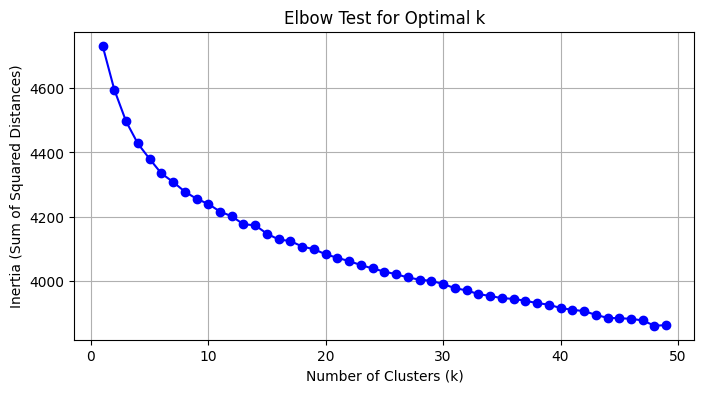

In [9]:
#Elbow Test to get optimal K
inertias = []
k_values = range(1, 50)

for k in k_values:
    clustering_model = KMeans(n_clusters=k, random_state=0)
    clustering_model.fit(embeddings)
    inertias.append(clustering_model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Test for Optimal k')
plt.grid(True)
plt.show()

In [10]:
#k means classifier
num_clusters = 8

clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clustering_model.fit(embeddings)
clusters = clustering_model.labels_
clustered_sentences = pd.DataFrame({'Sentence': all_parking_sentences, 'Cluster': clusters})

In [15]:
#display sample sentences from each cluster
samples = 5

for i in range(num_clusters):
    print(f"\nCluster {i}:")
    example_sentences = clustered_sentences[clustered_sentences['Cluster'] == i]['Sentence'].sample(samples)
    for sentence in example_sentences:
        print(f"- {sentence}")


Cluster 0:
- The old obviously being the existing parking structure and the new the three story retail and 12 story mixed use building.
- Just on housing, so the parking at the housing, I think the placement, the setbacks, no affordable weve discussed, and the design.
- We have a flat pad here, we have a flat pad where the pool is, weve got 20 slopes in the middle of this vacant area, weve got a flat parking area, wed like to have the flat parking area in the 20 slopes.
- The research that we did also revealed that what, its not a big dealthe kind of remainder piece of property between the back of the sidewalk and our parking lot is actually a very narrow thin triangular strip.
- And so the original plans you can see the parking configuration here.

Cluster 1:
- Again, my role was limited to just the parking variants.
- So they feel heard before this commission on the variances were was on November 27th 2012 and was continued for a limited public hearing to respond to Commissioner Kim

In [12]:
cluster_counts = clustered_sentences['Cluster'].value_counts().sort_index()

# for cluster_num, count in cluster_counts.items():
#     print(f"Cluster {cluster_num}: {count} sentences")

total_sentences = cluster_counts.sum()

for cluster_num, count in cluster_counts.items():
    percentage = (count / total_sentences) * 100
    print(f"Cluster {cluster_num}: {percentage:.2f}% of sentences")

"""
cluster 0: parking relative to the proposed project
cluster 1: 
cluster 2: *concern about lack of parking
cluster 3: *issues and inadequacies of parking on community
cluster 4: 
cluster 5: *beauracracy, compliance with regulations, application
cluster 6: 
cluster 7: *specific amount parking space requirements

"""

Cluster 0: 12.12% of sentences
Cluster 1: 10.67% of sentences
Cluster 2: 5.28% of sentences
Cluster 3: 13.19% of sentences
Cluster 4: 14.88% of sentences
Cluster 5: 15.00% of sentences
Cluster 6: 16.47% of sentences
Cluster 7: 12.40% of sentences


'\ncluster 0: aesthetics, parking placement relative to residential areas and site development\ncluster 1: \ncluster 2: *concern about lack of parking\ncluster 3: *issues and inadequacies of parking on community\ncluster 4: \ncluster 5: *beauracracy, compliance with regulations, application\ncluster 6: \ncluster 7: *specific amount parking space requirements\n\n'

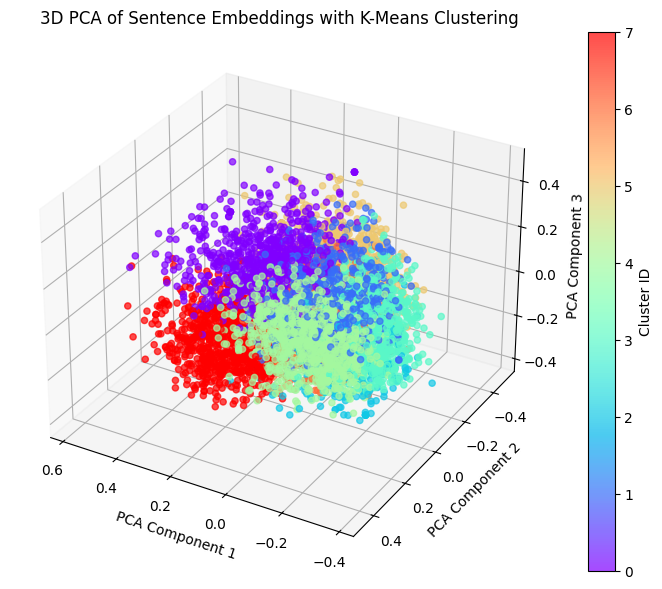

In [13]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=clusters, cmap='rainbow', alpha=0.7)
ax.view_init(elev=30, azim=120)


ax.set_title('3D PCA of Sentence Embeddings with K-Means Clustering')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter, ax=ax, label='Cluster ID')
plt.show()